x: (10000, 12)
y: (10000,)
Epoch 0 | MSE: 0.266844
Epoch 50 | MSE: 0.000523
Epoch 100 | MSE: 0.000523
Epoch 150 | MSE: 0.000523
Epoch 200 | MSE: 0.000523
Epoch 250 | MSE: 0.000523
Epoch 300 | MSE: 0.000523
Epoch 350 | MSE: 0.000523
Epoch 400 | MSE: 0.000523
Epoch 450 | MSE: 0.000523

 Best Epoch: 173
Best Loss (MSE): 0.000523
Best W: [0.00354823 0.00344453 0.00335638 0.0046746  0.0814415  0.0818194
 0.08219596 0.0808961  0.03739787 0.03867447 0.04096304 0.03767778]
Best b: -0.1434


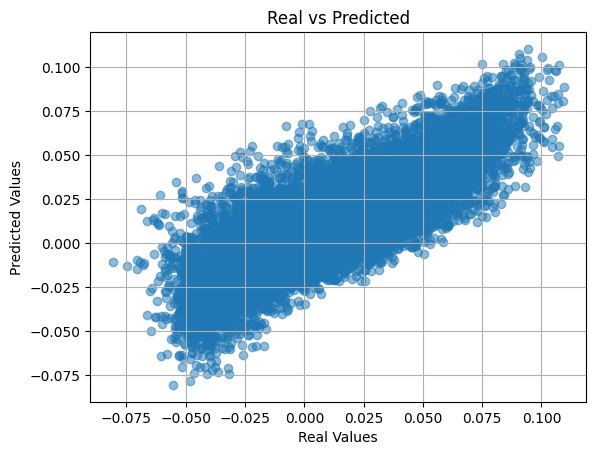

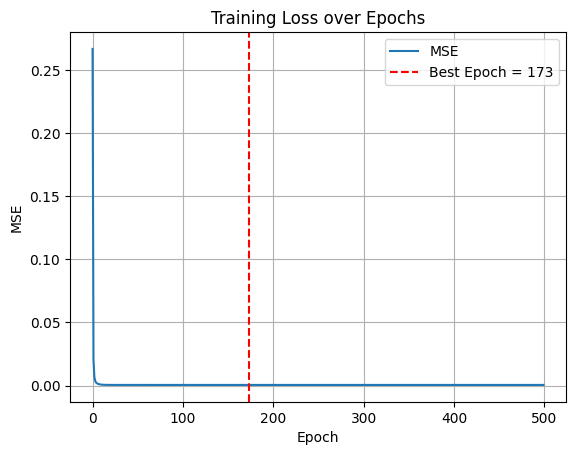

In [ ]:
import pandas as pd
from scipy.io import arff
import random
import matplotlib.pyplot as plt
import numpy as np



fatemeh = arff.loadarff(r'C:\Users\Adak\Desktop\AI\jupyter\dataset_')
df = pd.DataFrame(fatemeh[0])

x = df.iloc[:, :-1].values   
y = df.iloc[:, -1].values   
print("x:",x.shape)
print("y:", y.shape)
m, n = x.shape   

w = np.random.uniform(-1, 1, size=(n,))  
b = random.uniform(-1, 1)
lr = 0.001
epochs = 500

loss_hist = []
best_loss = float("inf")
best_epoch = -1
best_w, best_b = w.copy(), b

# (Gradient Descent)
for epoch in range(epochs):
    total_loss = 0
    
    for i in range(m):
        xi = x[i]      
        yi = y[i]
        
        y_pred = np.dot(w, xi) + b  
        error = y_pred - yi
        total_loss += error**2
        
        w -= lr * error * xi
        b -= lr * error
    
    mse = total_loss / m
    loss_hist.append(mse)
    

    if mse < best_loss:
        best_loss = mse
        best_epoch = epoch
        best_w = w.copy()
        best_b = b
    
    if epoch % 50 == 0:
        print(f"Epoch {epoch} | MSE: {mse:.6f}")


print("\n Best Epoch:", best_epoch)
print(f"Best Loss (MSE): {best_loss:.6f}")
print(f"Best W: {best_w}")
print(f"Best b: {best_b:.4f}")

y_pred_all = np.dot(x, best_w) + best_b


plt.scatter(y, y_pred_all, alpha=0.5)
plt.xlabel("Real Values")
plt.ylabel("Predicted Values")
plt.title("Real vs Predicted")
plt.grid(True)
plt.show()



plt.plot(range(epochs), loss_hist, label="MSE")
plt.axvline(best_epoch, color="r", linestyle="--", label=f"Best Epoch = {best_epoch}")
plt.xlabel("Epoch")
plt.ylabel("MSE")
plt.title("Training Loss over Epochs")
plt.legend()
plt.grid(True)
plt.show()




